# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline
%load_ext pycodestyle_magic

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [2]:
N = 48 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print(u"Реализуем алгоритм кластеризации '%s'" % my_algorithm)

Реализуем алгоритм кластеризации 'Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [23]:
# %%pycodestyle
# Задание 1
from sklearn.base import BaseEstimator, ClusterMixin


class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according
    """

    def __init__(self, k=3, max_iter=10, tol=0.001):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        self.weights = None
        self.expected_vs = None
        self.sigmas = None
        return

    def fit(self, x):
        """
        Use data matrix x to compute model parameters
        """
        expected_vs = self._init_centroids(x)
        self.expected_vs = np.copy(expected_vs)
        sigmas = [
                  np.matrix(np.diag(np.ones(x.shape[1])))
                  for _ in range(self.k)
                 ]
        weights = np.empty(self.k)
        weights.fill(1 / self.k)
        likelihoods = np.empty((self.k, x.shape[0]))

        for _ in range(self.max_iter):

            for i in range(self.k):
                tmp = np.matrix(x - expected_vs[i])
                likelihoods[i] = 1 / (np.pi ** (x.shape[1] / 2)) * \
                    1 / (np.linalg.det(sigmas[i]) ** (1 / 2)) * \
                    np.exp((-1 / 2) *
                           (np.array(tmp * np.linalg.inv(sigmas[i])) *
                           np.array(tmp)
                            ).sum(axis=1)
                           )

            tmp = np.array(likelihoods) * weights.reshape(-1, 1)

            mask = tmp.sum(axis=0) == 0
            if np.any(mask):
                dist = np.tile(expected_vs, (mask.sum(), 1)) - \
                       np.repeat(x[mask], expected_vs.shape[0], axis=0)
                dist = (dist * dist).sum(axis=1)
                tmp.T[mask] = (dist.reshape((-1, self.k), order='F'))

            gamma = tmp / tmp.sum(axis=0)
            weights = gamma.mean(axis=1)

            for i in range(self.k):
                tmp_sum = gamma[i].sum()
                tmp = x - expected_vs[i]
                tmp_sigm = np.matrix(np.empty((x.shape[1], x.shape[1])))
                for j in range(x.shape[1]):
                    tmp_sigm[j] = ((tmp[:, j].reshape(-1, 1) * tmp) *
                                   gamma[i].reshape(-1, 1)
                                   ).sum(axis=0) / tmp_sum
                if np.linalg.matrix_rank(tmp_sigm) == x.shape[1]:
                    sigmas[i] = tmp_sigm

                expected_vs[i] = (x * gamma[i].reshape(-1, 1)).sum(axis=0) / \
                    tmp_sum

            tmp_ = expected_vs - self.expected_vs
            if ((tmp_ * tmp_).sum(axis=1)).mean() < self.tol:
                break
            self.expected_vs = np.copy(expected_vs)

        self.weights = weights
        self.expected_vs = expected_vs
        self.sigmas = sigmas
        return self

    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        likelihoods = np.empty((self.k, x.shape[0]))
        for i in range(self.k):
            tmp = np.matrix(x - self.expected_vs[i])
            likelihoods[i] = 1 / (np.pi ** (x.shape[1] / 2)) * \
                1 / (np.linalg.det(self.sigmas[i]) ** (1 / 2)) * \
                np.exp((-1 / 2) *
                       (np.array(tmp * np.linalg.inv(self.sigmas[i])) *
                        np.array(tmp)
                        ).sum(axis=1)
                       )

        tmp = np.array(likelihoods) * self.weights.reshape(-1, 1)
        gamma = tmp / tmp.sum(axis=0)
        return np.argmax(gamma, axis=0)

    def fit_predict(self, x):
        self.fit(x)
        return self.predict(x)

    def _init_centroids(self, X):
        centroids = np.empty((self.k, X.shape[1]))
        centroids[0] = X[np.random.randint(low=0, high=X.shape[0])]
        dist = np.zeros((self.k, X.shape[0]))
        for i in range(1, self.k):
            for j in range(i):
                dist[j] = self._euclidean(X, centroids[j])
            min_dist = np.min(dist[:i, :], axis=0)
            sum_ = min_dist.sum()
            centr_sum = np.random.uniform(0, sum_)
            sums = np.cumsum(min_dist)
            centroids[i] = X[sums > centr_sum][0]
        return centroids

    @staticmethod
    def _euclidean(X, centroid):
        tmp = X - centroid
        return (tmp * tmp).sum(axis=1)


Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

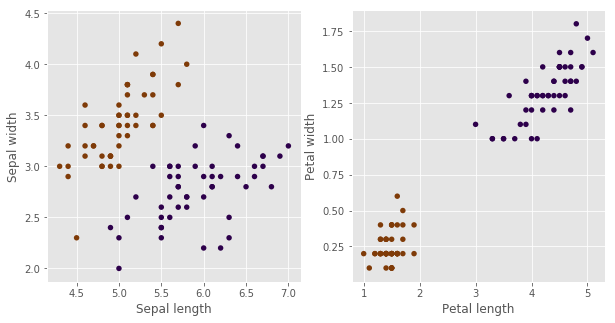

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [6]:
clf = Clustering(k=2, tol=0.0005)
pred_iris = clf.fit_predict(x_iris)
print("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


In [7]:
%%timeit
pred_iris = clf.fit_predict(x_iris)

2.66 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
from sklearn.mixture import GaussianMixture

In [9]:
clf_et = GaussianMixture(n_components=2)

In [10]:
%%timeit
clf_et.fit(x_iris)
pred_iris_ = clf_et.predict(x_iris)

2.77 ms ± 23.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [29]:
# %%pycodestyle
# Задание 2
# sihouette


def quality(x, y):
    """
    Implement quality criterion of your choice
    """
    n_clust = np.bincount(y).size

    assert n_clust != 1, 'Invalid cluster numb'

    res = 0
    for i in range(x.shape[0]):
        tmp = x - x[i]
        tmp = (tmp * tmp).sum(axis=1)
        a = tmp[y == y[i]].mean()

        b = np.finfo(np.float64).max
        for j in range(n_clust):
            if j != y[i] and np.any(y == j):
                b = min(b, tmp[y == j].mean())
        res += (b - a) / max(a, b)
    res /= x.shape[0]
    return res

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

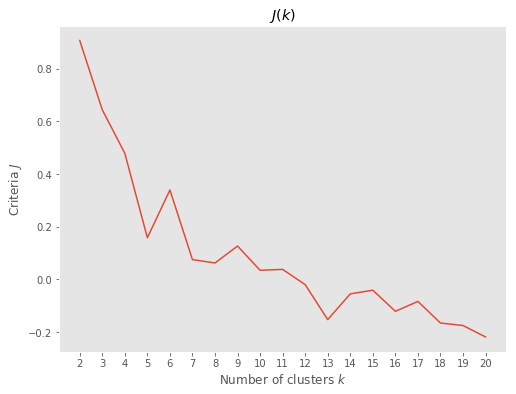

In [12]:
ks = range(2, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(k=k)
    cls.fit(x_iris)
    pred = cls.predict(x_iris)
    criteria[i] = quality(x_iris, pred)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.xticks(ks)
pl.grid()
pl.show()

In [ ]:
## Задание 3
# не сделано, кластеризация работает неправильно по сравнению с GaussianMixture, нет времени на исправление

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture

In [14]:
df = pd.read_csv('WDIData.csv')

In [15]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN,NaN


In [16]:
df = df.fillna(0)

In [17]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,0.0,0.0
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,0.0,0.0
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,0.0,0.0


In [18]:
le = LabelEncoder()

In [19]:
le.fit(df['Country Code'])
df['Country Code'] = le.transform(df['Country Code'])

In [20]:
le.fit(df['Indicator Code'])
df['Indicator Code'] = le.transform(df['Indicator Code'])

In [21]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,5,"2005 PPP conversion factor, GDP (LCU per inter...",894,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,Arab World,5,"2005 PPP conversion factor, private consumptio...",897,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,Arab World,5,Access to clean fuels and technologies for coo...,359,0.0,0.0,0.0,0.0,0.0,0.0,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,0.0,0.0
3,Arab World,5,Access to electricity (% of population),363,0.0,0.0,0.0,0.0,0.0,0.0,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,0.0,0.0
4,Arab World,5,"Access to electricity, rural (% of rural popul...",361,0.0,0.0,0.0,0.0,0.0,0.0,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,0.0,0.0


In [22]:
df.drop(['Indicator Name', 'Country Name'], axis=1, inplace=True)

In [23]:
df.head()

,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,5,894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,5,897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,5,359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,0.0,0.0
3,5,363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,0.0,0.0
4,5,361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,0.0,0.0


In [24]:
df = df.loc[:, (df != 0).any(axis=0)]
df.shape

(420024, 60)

In [25]:
x = np.array(df)

In [26]:
x.shape

(420024, 60)

In [27]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [28]:
# cls = GaussianMixture(n_components=2)
cls = Clustering(k=2)

In [29]:
cls.fit(x)
pred = cls.predict(x)

/home/asivkov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars
/home/asivkov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/home/asivkov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide
/home/asivkov/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)
/home/asivkov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in double_scalars


In [32]:
(pred == 0).sum()

420024

In [33]:
(pred == 1).sum()

0

In [ ]:
## Задание 4

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.